<a href="https://colab.research.google.com/github/sy-veronica/ML/blob/main/04_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4. Logistic Regression (로지스틱회귀)**

### 공부시간에 따른 자격증 시험 합격 가능성

In [6]:
# (1) 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# (2) 데이터셋 불러오기
dataset = pd.read_csv('/content/drive/MyDrive/03. 파이썬 (ML)/02. dataset/LogisticRegressionData.csv')

In [8]:
# (3) X (독립변수, 원인), y (종속변수, 결과) 지정하기
X = dataset.iloc[:,:-1].values  # 처음부터 마지막 컬럼 직전까지의 데이터
y = dataset.iloc[:,-1].values   # 마지막 컬럼 데이터

In [12]:
# (4) 데이터셋 분리하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# (5) 로지스틱회귀 모델 만들기
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()   # 로지스틱회귀 모델 객체 생성
classifier.fit(X_train, y_train)    # 로지스틱회귀 모델 학습 (훈련련데이터 사용)

LogisticRegression()

In [22]:
# (6-1) 생성한 로지스틱회귀 모델을 이용한 결과 예측
# 6시간 공부했을 떄 합격/불합격 결과 예측
classifier.predict([[6]])  # 결과1 : 합격할 것으로 예측

array([1])

In [23]:
# (6-1) 생성한 로지스틱회귀 모델을 이용한 결과 예측
# 6시간 공부했을 떄 합격/불합격 확률 예측
classifier.predict_proba([[6]])  # 불합격 확률(14%), 합격 확률(86%) 예측

array([[0.14150735, 0.85849265]])

In [24]:
# (6-2) 생성한 로지스틱회귀 모델을 이용한 결과 예측
# 4시간 공부했을 떄 합격/불합격 결과 예측
classifier.predict([[4]])  # 결과2 : 불합격할 것으로 예측

array([0])

In [25]:
# (6-2) 생성한 로지스틱회귀 모델을 이용한 결과 예측
# 4시간 공부했을 떄 합격/불합격 확률 예측
classifier.predict_proba([[4]])  # 불합격 확률(62%), 합격 확률(38%) 예측

array([[0.6249966, 0.3750034]])

In [27]:
# 분류결과 예측하기
y_pred = classifier.predict(X_test)
y_pred   # 테스트 세트를 사용한 y예측값

array([1, 0, 1, 1])

In [28]:
y_test   # 테스트 세트의 실제 y값

array([1, 0, 1, 0])

In [29]:
X_test   # 테스트 세트의 X값

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [31]:
# 모델 평가 (테스트 세트 사용)
classifier.score(X_test, y_test) # 모델 평가
# 전체 테스트 세트 4개 중, 분류 예측을 올바르게 맞힌 갯수 3/4

0.75

### **데이터 시각화(훈련 세트 활용)**

In [ ]:
# 데이터 시각화 (훈련 세트 활용)
X_range = np.arange(min(X), max(X), 0.1)  # X 최솟값에서 최댓값까지를 0.1단위로 잘라서 데이터를 생성성
X_range

In [ ]:
# p = 1 / (1 + np.exp(-y))   # y = mx + b
# p = 1 / (1 + np.exp(-(m*X_range + b)))
p = 1 / (1+np.exp(-(classifier.coef_ * X_range + classifier.intercept_)))
p

In [36]:
X_range.shape , p.shape

((95,), (1, 95))

In [39]:
p = p.reshape(-1)
p.shape

(95,)

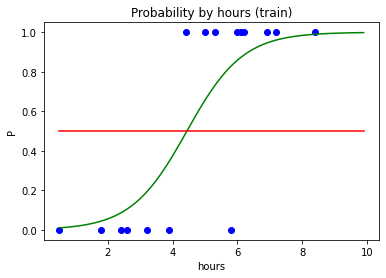

In [44]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red')  # X_range 갯수만큼 0.5로 가득찬 배열 만들기기
plt.title('Probability by hours (train)')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

### **데이터 시각화 (테스트 세트 활용)**

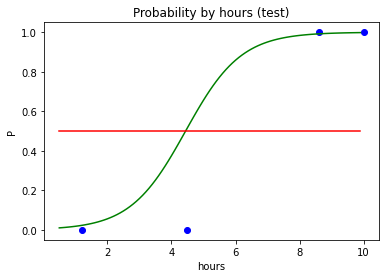

In [45]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red')  # X_range 갯수만큼 0.5로 가득찬 배열 만들기기
plt.title('Probability by hours (test)')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

In [47]:
classifier.predict_proba([[4.5]]) # 4.5시간 공부했을 때, 불합격/합격 확률

array([[0.48310686, 0.51689314]])